In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

from statistics import pvariance
from matplotlib.patches import FancyArrowPatch
from collections import Counter
from functions_pgc import sort_dict

In [2]:
df_kills = pd.read_csv('kills.csv')
df_pp = pd.read_csv('placement_points.csv')
df_points = pd.read_csv('points.csv')

pgc = ['Virtus.pro', 'FaZe Clan', 'Natus Vincere', 'Team Liquid', 'Question Mark', 'HEROIC', 'ENCE', 'BBL Esports']
pgc = [i.upper() for i in pgc]
teams = [i for i in df_kills.columns if i not in ['type', 'tournament', 'tournament_number', 'game_number']]

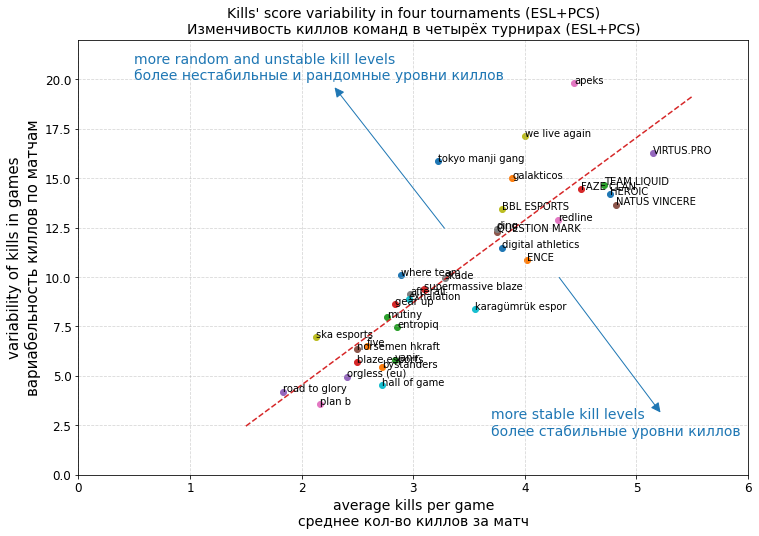

In [3]:
ax = plt.figure(figsize=[12, 8])

kills_values = list()
pvariance_values = list()

for team in teams:
    kills = df_kills[team].mean()
    pvariance = statistics.pvariance(df_kills[team].dropna())
    
    plt.scatter(kills, pvariance)
    plt.text(kills, pvariance, team)
    
    kills_values.append(kills)
    pvariance_values.append(pvariance)

plt.xlim([0, 6])
plt.ylim([0, 22])

z = np.polyfit(kills_values, pvariance_values, 1)
p = np.poly1d(z)

plt.plot([1.5, 5.5], [p(1.5), p(5.5)], linestyle="--", color='tab:red')
plt.grid(linestyle='--', alpha=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0.5, 20, s='more random and unstable kill levels\nболее нестабильные и рандомные уровни киллов', fontsize=14, color='tab:blue')
plt.text(3.7, 2, s='more stable kill levels\nболее стабильные уровни киллов', fontsize=14, color='tab:blue')

plt.xlabel('average kills per game\nсреднее кол-во киллов за матч', fontsize=14)
plt.ylabel('variability of kills in games\nвариабельность киллов по матчам', fontsize=15)

ax.add_artist(FancyArrowPatch(posA=(0.55, 0.55), posB=(0.42, 0.8), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))
ax.add_artist(FancyArrowPatch(posA=(0.68, 0.47), posB=(0.8, 0.23), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))

plt.title("Kills' score variability in four tournaments (ESL+PCS)\nИзменчивость киллов команд в четырёх турнирах (ESL+PCS)", fontsize=14)
plt.savefig("kills_variability.png", bbox_inches='tight', dpi=200)

Teams located lower and to the right of the red dashed line show more stable kill levels and reversed is expectable. Apeks show most unstable kill levels among the most killing teams, same for TMG among the mid-level teams. NaVi and Karagumruk Espor show most stable kill levels.

Variability is derived from variance (https://en.wikipedia.org/wiki/Statistical_dispersion). Variability linearly depends on the average value of kills, so 1-dimentional bar chart of variability is unacceptable. We need 2D chart with two axes of variance and average kills value. True variability needs to be evaluated concerning average kills value, that's why arrows are diagonal, not just vertical\
\
\
Команды, которые находятся ниже и правее от красной пунктирной линии, показывают более стабильные уровни киллов и наоборот. Среди команд с высоким уровнем киллов самая нестальбильная команда - Apeks. Среди среднекилловых команд самая нестабильная это TMG. Самые стабильные по киллам команды это NaVi и karagumruk espor

Вариабельность оценивалась по дисперсии (https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B). Вариабельность линейно зависит от количества киллов, поэтому нельзя просто построить одномерную столбчатую диаграмму с вариабельностью. Нужна 2D-диаграмма с двумя осями вариабельности и киллов. Оценивать реальную вариабельность нужно с учётом обоих параметров, поэтому стрелки вариабельности диагональны, а не вертикальны.

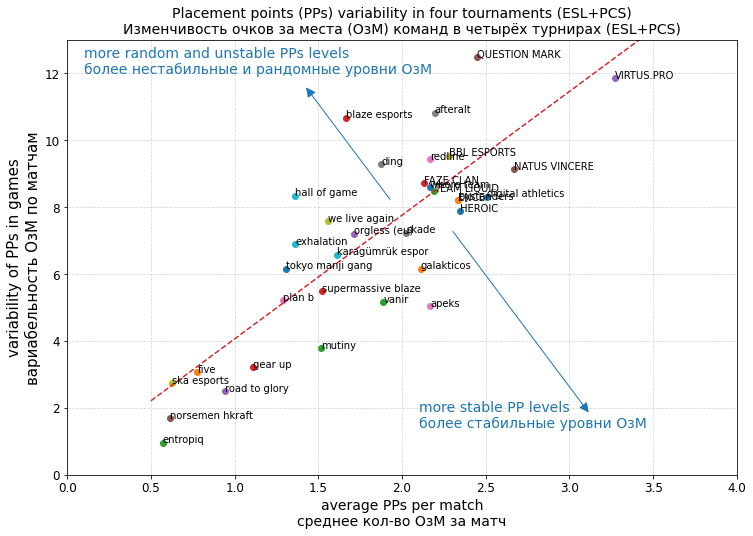

In [4]:
ax = plt.figure(figsize=[12, 8])

pp_values = list()
pvariance_values = list()

for team in teams:
    pp = df_pp[team].mean()
    pvariance = statistics.pvariance(df_pp[team].dropna())
    
    plt.scatter(pp, pvariance)
    plt.text(pp, pvariance, team)
    
    pp_values.append(pp)
    pvariance_values.append(pvariance)

plt.xlim([0, 4])
plt.ylim([0, 13])

z = np.polyfit(pp_values, pvariance_values, 1)
p = np.poly1d(z)

plt.plot([0.5, 3.5], [p(0.5), p(3.5)], linestyle="--", color='tab:red')
plt.grid(linestyle='--', alpha=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0.1, 12, s='more random and unstable PPs levels\nболее нестабильные и рандомные уровни ОзМ', fontsize=14, color='tab:blue')
plt.text(2.1, 1.4, s='more stable PP levels\nболее стабильные уровни ОзМ', fontsize=14, color='tab:blue')

plt.xlabel('average PPs per match\nсреднее кол-во ОзМ за матч', fontsize=14)
plt.ylabel('variability of PPs in games\nвариабельность ОзМ по матчам', fontsize=15)

ax.add_artist(FancyArrowPatch(posA=(0.5, 0.6), posB=(0.4, 0.8), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))
ax.add_artist(FancyArrowPatch(posA=(0.57, 0.55), posB=(0.73, 0.23), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))

plt.title("Placement points (PPs) variability in four tournaments (ESL+PCS)\nИзменчивость очков за места (ОзМ) команд в четырёх турнирах (ESL+PCS)", fontsize=14)
plt.savefig("PP_variability.png", bbox_inches='tight', dpi=200)

same for placement points

то же самое для очков мест

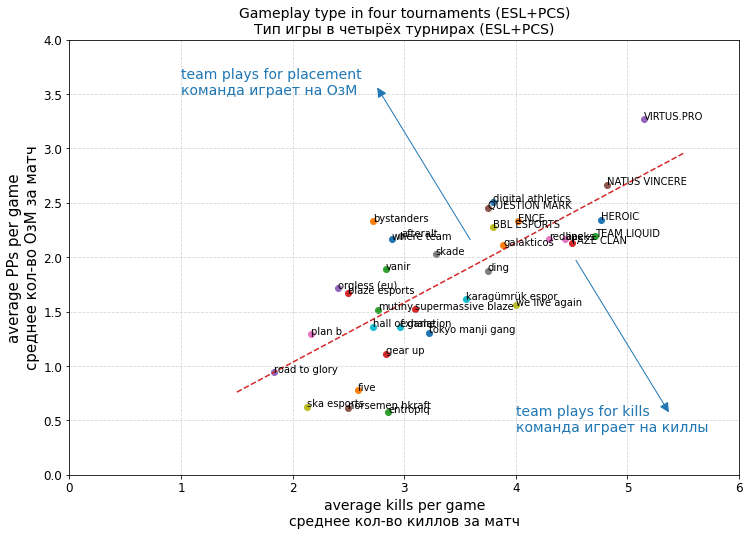

In [5]:
ax = plt.figure(figsize=[12, 8])

kills_values = list()
pp_values = list()

for team in teams:
    pp = df_pp[team].mean()
    kills = df_kills[team].mean()
    
    plt.scatter(kills, pp)
    plt.text(kills, pp, team)
    
    kills_values.append(kills)
    pp_values.append(pp)
    
#plt.xlabel('kills')
#plt.ylabel('placement points')

plt.xlim([0, 6])
plt.ylim([0, 4])

z = np.polyfit(kills_values, pp_values, 1)
p = np.poly1d(z)
plt.plot([1.5, 5.5], [p(1.5), p(5.5)], linestyle="--", color='tab:red')
plt.grid(linestyle='--', alpha=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(1, 3.5, s='team plays for placement\nкоманда играет на ОзМ', fontsize=14, color='tab:blue')
plt.text(4, 0.4, s='team plays for kills\nкоманда играет на киллы', fontsize=14, color='tab:blue')

plt.xlabel('average kills per game\nсреднее кол-во киллов за матч', fontsize=14)
plt.ylabel('average PPs per game\nсреднее кол-во ОзМ за матч', fontsize=15)

ax.add_artist(FancyArrowPatch(posA=(0.59, 0.53), posB=(0.48, 0.8), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))
ax.add_artist(FancyArrowPatch(posA=(0.71, 0.5), posB=(0.82, 0.23), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))

plt.title("Gameplay type in four tournaments (ESL+PCS)\nТип игры в четырёх турнирах (ESL+PCS)", fontsize=14)
plt.savefig("kills_PP_gameplay_type.png", bbox_inches='tight', dpi=200)

Main point of this chart is to show the balance of kills and placement points of teams. Teams that are located upper and to the left of the red dashed line tend to get more kills than placement points. Reverse is expectable. One can see that Virtus.Pro, as expected, mostly plays for placement points. Same for Bystanders. Team liquid mostly plays for kills, like WLA and Entropiq. This chart doesn't show the way teams want to play, but just what turned out after their performance.

Основная цель этого графика показать баланс киллов и очков за места. Выше и левее красной пунктирной линии находятся команды, которые предпочитают играть на места, на киллы - наоборот. Хорошо видно, что Virtus.Pro и Bystanders играют на места, а Team Liquid, WLA, Entropiq - на киллы. График не показывает желания людей на что играть, а только то, что получилось из их игры.

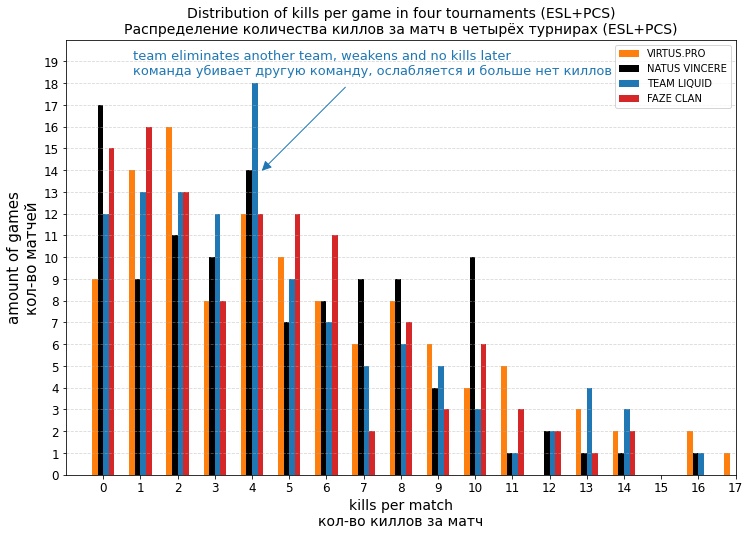

In [6]:
ax = plt.figure(figsize=[12, 8])

mapping_colors = {'VIRTUS.PRO': 'tab:orange', 'NATUS VINCERE': 'k', 'TEAM LIQUID': 'tab:blue', 'FAZE CLAN': 'tab:red'}
mapping_x = [-0.225, -0.075, 0.075, 0.225]
mapping_alpha = [0.1, 0.2, 0.1, 0.2]

for team, x in zip(mapping_colors, mapping_x):
    dct = sort_dict(Counter(df_kills[team]), by='key', reverse=False)
    plt.bar([i + x for i in dct], dct.values(), width=0.15, label=team, color=mapping_colors[team])
    #plt.scatter([i for i in dct], dct.values())

plt.ylim([0, 20])
plt.xlim([-1, 17])
plt.legend()
plt.grid(linestyle='--', alpha=0.5, axis='y')

plt.xticks(range(0, 18), fontsize=12)
plt.yticks(range(0, 20), fontsize=12)

plt.text(0.8, 18.4, s='team eliminates another team, weakens and no kills later\nкоманда убивает другую команду, ослабляется и больше нет киллов', fontsize=13, color='tab:blue')

plt.xlabel('kills per match\nкол-во киллов за матч', fontsize=14)
plt.ylabel("amount of games\nкол-во матчей", fontsize=15)

ax.add_artist(FancyArrowPatch(posA=(0.45, 0.8), posB=(0.35, 0.65), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))

plt.title("Distribution of kills per game in four tournaments (ESL+PCS)\nРаспределение количества киллов за матч в четырёх турнирах (ESL+PCS)", fontsize=14)
plt.savefig("Distribution_of_kills.png", bbox_inches='tight', dpi=200)

Chart shows how many times teams got corresponding kill-level games. For example, Virtus.Pro has nine games with zero kills in each and two games with 16 kills each. Team liquid has three games with 14 kills in each. There is only one but very interesting feature on this chart - strong signal at the 4-kills games. TL has twice more games with 4 kills than with games with 3 or 5 kills. NaVi has 1.5 times more games with 4-kills. It is not a statistical fluctuation or coincidence.

I can interpret (imho) this signal as a games with 4v4 fights, at which teams on the chart eliminates another team (got 4 kills), but has been weakened - e.g. some team members were killed or team got pushed after such heavy fight. Expectable, after this kind of fight (4v4 with 4 kills and some deaths) it is more difficult to earn extra kills and team finishes the game with earlier made 4 kills. That's why we see so many 4-kills games with less 3- and 5-kills games.\
\
\
График показывает сколько и каких килловых игр у команды. Например, у VP девять игр с нулём киллов и две игры с 16 киллами. У TL три игры с 14 киллами. На графике есть только одна, но очень интересная особенность - сильный сигнал у игр с 4 киллами. Это не статистическая флуктуация и не совпадение.

Я лично интерпретирую этот сигнал как игры с файтами 4 на 4, где одна команда убивает другую команду (зарабатывает 4 килла), но ослабляется - например кто-то был убит или сразу за тяжёлым боем следует пуш. Ожидаемо, что после такого боя и потери тиммейтов будет сложнее заработать дополнительные киллы и команда завершает матч с этими 4 килами. Поэтому мы видим много игр с 4 киллами, но меньше с 3 и 5 киллами.

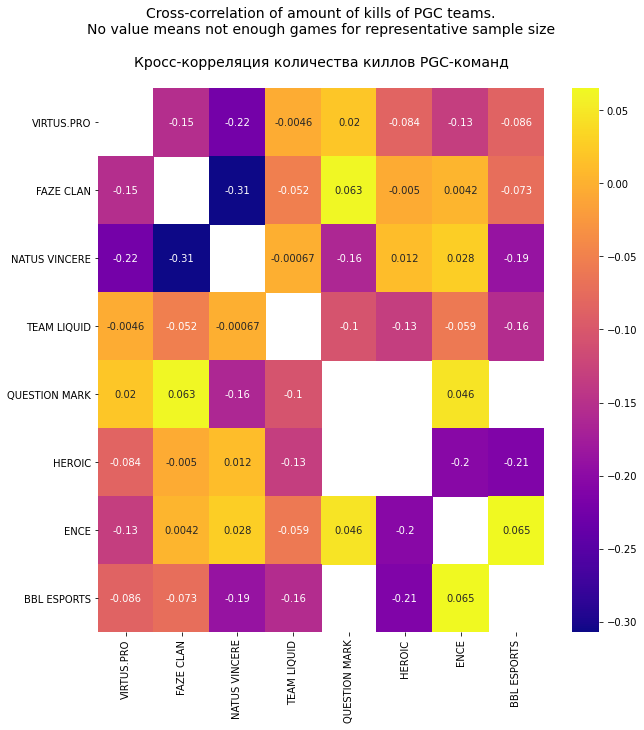

In [7]:
plt.figure(figsize=[10, 10])
corr = df_kills.corr(min_periods=60)
corr = corr.replace(1, np.nan)
corr = corr[pgc]
corr = corr.loc[pgc]
sns.heatmap(corr, cmap="plasma", annot=True);

plt.title('Cross-correlation of amount of kills of PGC teams.\nNo value means not enough games for representative sample size\n\nКросс-корреляция количества киллов PGC-команд\n', fontsize=14);
plt.savefig("cross_correlation.png", bbox_inches='tight', dpi=200)

Chart shows correlations of kills in games between the teams. For example, if team "A" got [0, 10, 10, 10, 1] kills in five games and team "B" got something same like [1, 9, 10, 9, 0] kills in same games, so their performance strongly positively correlates with coefficient=0.9866 and one can say that team "A" and team "B" do not interfere in the lobby with each other. if team "C" got something reversed like [10, 0, 0, 0, 8] kills in five games, so one can say that team "C" interfere with teams "A" and "B" in the same lobby and that is why their kills values negatively correlates with coefficient=-0.9972 (see examples below). Of course, five games, like in example, in not a representative sample and correlation most likely is coincidental. But there is 114 games in the dataset, which is enough to be a representative sample. So correlations at the chart are not coincedental. Zero correlation means no correlation.

Negative correlation of -0.31 between NaVi and Faze is statistically significant. I can't interpret this, but what numbers tell us is that when NaVi has a good game, Faze has a bad game. And when NaVi has a bad game, Faze has a good game. Of course, not always, cause the correlation in rather weak, but dependency is noticable.\
\
\
График показывает корреляцию киллов в играх между командами. Например, если команда "А" в пяти играх набирает [0, 10, 10, 10, 1] киллов, а команда "Б" что-то вроде [1, 9, 10, 9, 0] киллов, то их выступление имеет положительную корреляцию с коэффициентом 0.9866 и можно сказать, что команды не сталкиваются в лобби друг с другом. Если команда "В" набирает противоположные [10, 0, 0, 0, 8] киллов, то можно сказать что команда "В" часто сталкивается в лобби с командами "А" или "Б" или обеими и поэтому киллы отрицательно коррелируют с коэффициентом -0.9972 (см. примеры ниже). Конечно, пять игр это недостаточная выборка и корреляции могут быть случайны, но в датасете 114 игр, что достаточно для репрезентативной выборки. Поэтому корреляции на графике не являются случайностями.

Видна отрицательная корреляция с коэффициентом -0.31 между Нави и Фейзами и это статистически значимо. Я не могу интерпретировать это, но цифры говорят, что когда у Нави хорошая игра - у Фейзов плохая. И наоборот, когда у Нави плохая, то у фейзов хорошая. Конечно, не всегда, так как корреляция слабая, но связь всё-таки есть.

In [11]:
A = [0, 10, 10, 10, 1]  # kills in five games in same lobby
B = [1, 9, 10, 9, 0]
C = [10, 0, 0, 0, 8]
D = [5, 10, 6, -1, 3]

print(f'team "A" and team "B" correlation is {np.corrcoef(A, B)[0][1]}')
print(f'team "A" and team "C" correlation is {np.corrcoef(A, C)[0][1]}')
print(f'team "A" and team "D" correlation is {np.corrcoef(A, D)[0][1]}')

team "A" and team "B" correlation is 0.9866181605053032
team "A" and team "C" correlation is -0.9972165365070479
team "A" and team "D" correlation is 0.12347956582264463


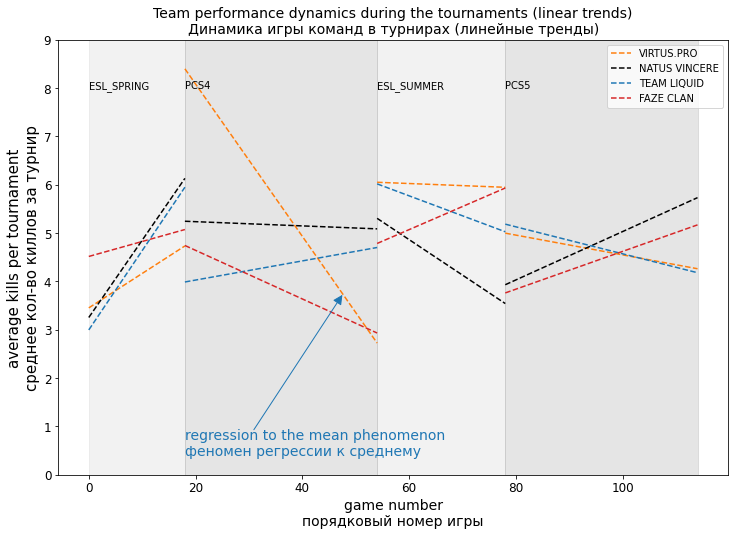

In [9]:
tournaments = ['esl_spring',
               'pcs4',
               'esl_summer',
               'pcs5']

ax = plt.figure(figsize=[12, 8])

game_number = 0
for n, tournament in enumerate(tournaments):
    group = df_kills[df_kills['tournament'] == tournament]
    for team in ['VIRTUS.PRO', 'NATUS VINCERE', 'TEAM LIQUID', 'FAZE CLAN']:
        z = np.polyfit(list(range(game_number, game_number + len(group))), list(group[team]), 1)
        p = np.poly1d(z)
        
        if tournament == 'esl_summer':
            plt.plot([game_number, game_number + len(group)], [p(game_number), p(game_number + len(group))], linestyle="--", color=mapping_colors[team], label=team)
        else:
            plt.plot([game_number, game_number + len(group)], [p(game_number), p(game_number + len(group))], linestyle="--", color=mapping_colors[team])
    
    plt.axvspan(game_number, game_number+len(group), alpha=mapping_alpha[n], color='grey')
    plt.text(game_number, 8, s=tournament.upper())
    
    game_number += len(group)
    
plt.ylim([0, 9])

plt.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(18, 0.4, s='regression to the mean phenomenon\nфеномен регрессии к среднему', fontsize=14, color='tab:blue')

plt.xlabel('game number\nпорядковый номер игры', fontsize=14)
plt.ylabel('average kills per tournament\nсреднее кол-во киллов за турнир', fontsize=15)

ax.add_artist(FancyArrowPatch(posA=(0.35, 0.2), posB=(0.455, 0.44), ec='tab:blue', arrowstyle='-|>', mutation_scale=20))

plt.title("Team performance dynamics during the tournaments (linear trends)\nДинамика игры команд в турнирах (линейные тренды)", fontsize=14)
plt.savefig("team_performance_dynamics.png", bbox_inches='tight', dpi=200)